In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
match_data = pd.read_csv('match_data')
match_data.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:30:37,2024-08-09 18:01:37,2024-08-09 18:01:37,29,0,2024-08-09 18:30:32,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1


In [148]:
match_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,6.394400e+04,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,60916.000000,60937.000000,36010.000000,36013.000000,...,61984.000000,61995.000000,62811.000000,62818.000000,61729.000000,61740.000000,63864.000000,63875.000000,40700.000000,40707.000000
mean,1.914800e+07,25.476526,27.695421,18.510137,29.482377,8.698023,2.010276,2.631209,0.812746,0.901397,...,8.411122,8.613533,8.751254,9.090722,7.766755,9.851749,0.911640,0.802630,0.011794,0.005503
std,1.345825e+04,14.496434,18.289720,64.166275,82.639170,12.092077,1.950212,2.292960,0.794087,0.826550,...,5.695672,5.720836,5.957945,6.351125,6.054359,7.351268,1.166182,1.069864,0.117546,0.073977
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,13.000000,10.000000,1.330000,1.950000,3.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,25.000000,27.000000,2.500000,4.000000,3.750000,2.000000,2.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,1.915513e+07,38.000000,44.000000,5.500000,13.000000,7.500000,3.000000,4.000000,1.000000,1.000000,...,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,1.000000,1.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,501.000000,501.000000,51.000000,12.000000,14.000000,5.000000,6.000000,...,33.000000,33.000000,34.000000,45.000000,45.000000,46.000000,9.000000,7.000000,2.000000,1.000000


## Task 1

To start off, some data preprocessing is necessary. All rows where the game was either stopped or suspended should not be taken into account. As this task should be perform separately for each half of the game, the data has to be grouped into first and second half.

In [149]:
filtered_data = match_data.loc[(match_data["suspended"] == False) & (match_data["stopped"] == False)]

In [150]:
first_half_data = filtered_data.loc[filtered_data["halftime"] == "1st-half"]
first_half_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,2.914800e+04,29148.000000,29148.000000,29148.000000,29148.000000,29148.000000,26248.000000,26269.000000,9871.000000,9873.000000,...,27279.000000,27290.000000,28066.000000,28073.000000,27021.000000,27032.000000,29070.000000,29081.000000,12665.000000,12671.000000
mean,1.914782e+07,24.472005,25.193701,4.083401,6.803229,4.860470,0.966245,1.253759,0.612400,0.692596,...,4.118883,4.310004,4.419761,4.550137,3.738389,4.690293,0.296113,0.259276,0.002211,0.001973
std,1.338062e+04,14.021972,17.869122,7.677947,12.386215,4.802945,1.178413,1.317302,0.624317,0.641301,...,3.001402,3.147057,3.295656,3.374758,3.236105,3.782570,0.588369,0.563842,0.046969,0.044376
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.830000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,12.000000,9.000000,1.570000,2.100000,3.100000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,24.000000,23.000000,2.300000,3.400000,3.500000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,1.915512e+07,36.000000,40.000000,3.600000,6.000000,4.500000,1.000000,2.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,151.000000,201.000000,51.000000,7.000000,11.000000,3.000000,3.000000,...,19.000000,18.000000,21.000000,24.000000,20.000000,25.000000,4.000000,5.000000,1.000000,1.000000


In [151]:
second_half_data = filtered_data.loc[filtered_data["halftime"] == "2nd-half"]
second_half_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,2.697900e+04,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,20017.000000,20017.000000,...,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,22178.000000,22179.000000
mean,1.914783e+07,24.141443,30.432855,21.352562,35.031131,8.361629,2.863449,3.725972,0.847430,0.912275,...,11.789429,12.065755,12.482449,12.925423,11.098855,14.053523,1.428704,1.276252,0.016773,0.007935
std,1.349298e+04,14.046886,18.382152,62.400571,83.331581,10.543545,2.025954,2.258181,0.740381,0.753222,...,4.626645,4.587909,4.960898,5.495103,5.682415,6.560487,1.242005,1.149834,0.141456,0.088729
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913529e+07,12.000000,13.000000,1.200000,1.610000,2.200000,1.000000,2.000000,0.000000,0.000000,...,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
50%,1.913973e+07,24.000000,32.000000,3.100000,6.000000,4.330000,3.000000,3.000000,1.000000,1.000000,...,11.000000,12.000000,12.000000,12.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000
75%,1.915512e+07,36.000000,48.000000,11.000000,26.000000,9.000000,4.000000,5.000000,1.000000,1.000000,...,15.000000,15.000000,16.000000,16.000000,14.000000,18.000000,2.000000,2.000000,0.000000,0.000000
max,1.917212e+07,72.000000,59.000000,501.000000,501.000000,51.000000,12.000000,13.000000,4.000000,3.000000,...,32.000000,32.000000,34.000000,45.000000,44.000000,44.000000,8.000000,6.000000,2.000000,1.000000


### 1.1 & 1.2

For 1.1 and 1.2, the probabilities for each match outcome are calculated. At first, the probabilities are taken as the inverse of the bookmakers odds. In 1.2, the formula given in the assignment is used to normalize the probabilities.


In [152]:
def calc_probability(data):
    data=data.copy()
    data['P_home']=1/data['1']
    data['P_draw']=1/data['X']
    data['P_away']=1/data['2']
    
    return data

def calc_prob(data):
    P = pd.DataFrame({
        'P_home': 1/data['1'],
        'P_away': 1/data['2'],
        'P_draw': 1/data['X']
    })
    return P

def calc_prob_norm(data):
    normalization = 1/(1/data['1'] + 1/data['2'] + 1/data['X'])
    P_fair = pd.DataFrame({
        'P_home_n': 1/data['1'] * normalization,
        'P_away_n': 1/data['2'] * normalization,
        'P_draw_n': 1/data['X'] * normalization
    })
    return P_fair

In [153]:
first_half_P = calc_prob(first_half_data)
second_half_P = calc_prob(second_half_data)

first_half_P_norm = calc_prob_norm(first_half_data)
second_half_P_norm = calc_prob_norm(second_half_data)

In [154]:
first_half_data_prob = pd.concat([first_half_data, first_half_P, first_half_P_norm], axis=1)
second_half_data_prob = pd.concat([second_half_data, second_half_P, second_half_P_norm], axis=1)

### 1.3
First, P(home win) - P(away win) is plotted against P(draw) in a scatter plot for both first and second half.

In [155]:
def scatter(data, half: str):
    # Calculate P(home win) - P(away win)
    data['P_diff'] = data['P_home'] - data['P_away']

    # Scatter plot for bookmaker's probabilities
    plt.scatter(data['P_diff'], data['P_draw'], alpha=0.5, s=10)
    plt.xlabel("P(Home Win) - P(Away Win)")
    plt.ylabel("P(Draw)")
    plt.ylim(0,1)
    plt.title(f"Bookmaker Probabilities {half}")
    
def scatter_norm(data, half: str):
    # Calculate P(home win) - P(away win)
    data['P_diff'] = data['P_home_n'] - data['P_away_n']

    # Scatter plot for bookmaker's probabilities
    plt.scatter(data['P_diff'], data['P_draw_n'], alpha=0.5, s=10)
    plt.xlabel("P(Home Win) - P(Away Win)")
    plt.ylabel("P(Draw)")
    plt.ylim(0,1)
    plt.title(f"Normalized Bookmaker Probabilities {half}")
    

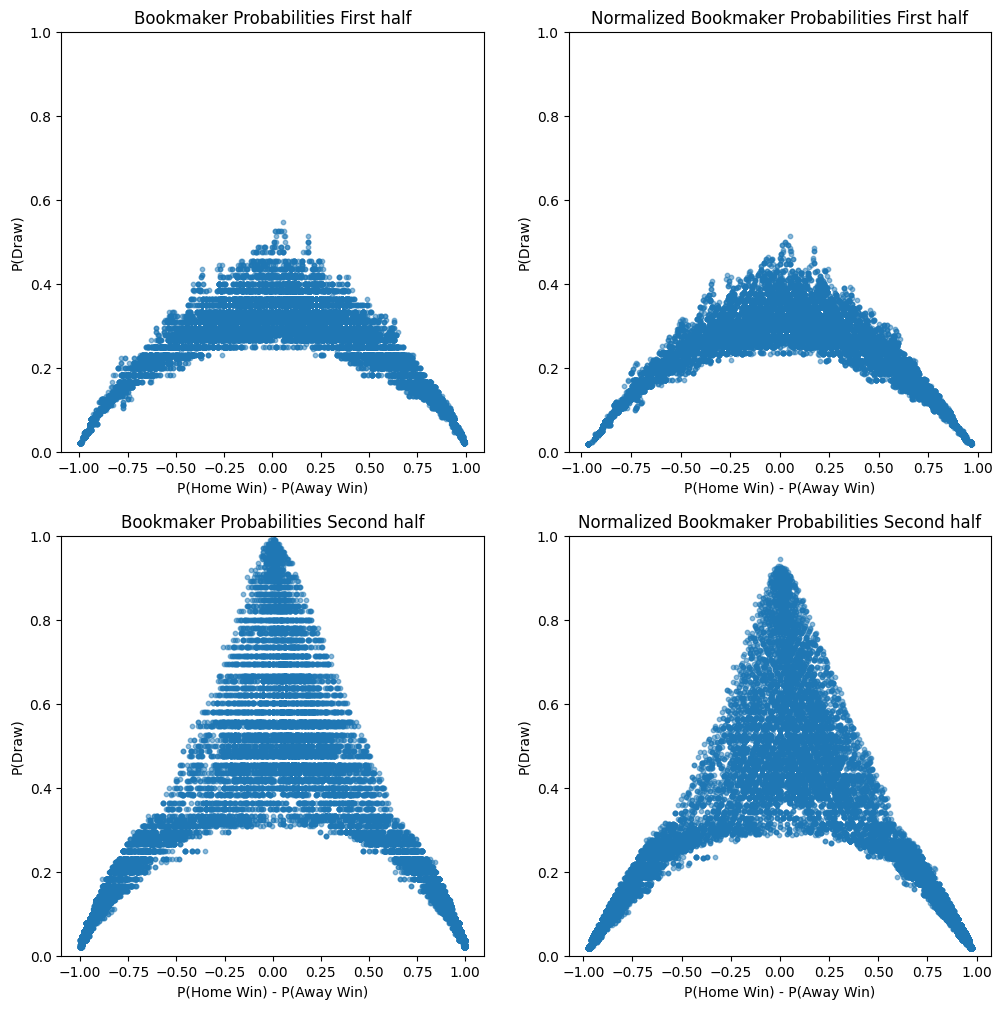

In [156]:
fig, _ = plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)
scatter(first_half_data_prob, 'First half')
plt.subplot(2, 2, 2)
scatter_norm(first_half_data_prob, 'First half')

plt.subplot(2, 2, 3)
scatter(second_half_data_prob, 'Second half')
plt.subplot(2, 2, 4)
scatter_norm(second_half_data_prob, 'Second half')
plt.show()

## 1.4
The bookmakers probabilities are discretized into bins with a width of 0.2. Using the actual match results, the draw probability is calculated for each bin and is contrasted with the bookmakers assumed probabilities. As P(home win) and P(away win), the inverse of the bookmakers odds is used instead of the normalized probabilities.

In [157]:
def bins(data, half,norm):
    # Calculate P(home win) - P(away win)
    if norm==True:
        data['P_diff'] = data['P_home_n'] - data['P_away_n']
    else:
        data['P_diff'] = data['P_home'] - data['P_away']
        

    # Define bins and categorize data
    bins = np.arange(-1, 1.2, 0.2)  # Define bins from -1 to 1 with intervals of 0.2
    data['P_diff_bin'] = pd.cut(data['P_diff'], bins)

    # Group data by P_diff_bin
    grouped = data.groupby('P_diff_bin', observed=False)

    # Count draws and total matches in each bin
    actual_draws = grouped.apply(lambda g: g[g['result'] == 'X'].shape[0], include_groups=False)
    total_matches = grouped.size()  # Total matches in each bin

    # Calculate the actual probability of draws in each bin
    actual_draw_probabilities = actual_draws / total_matches

    # Bar plot for actual vs bookmaker probabilities
    bin_centers = bins[:-1] + 0.1  # Calculate bin centers for plotting

    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers, actual_draw_probabilities, width=0.15, alpha=0.6, label="Actual P(Draw)", align='center')
    if norm==True:
        plt.bar(bin_centers, grouped['P_draw_n'].mean(), width=0.15, alpha=0.6, label="Bookmaker P(Draw)", align='edge')
    else:
        plt.bar(bin_centers, grouped['P_draw'].mean(), width=0.15, alpha=0.6, label="Bookmaker P(Draw)", align='edge')
    #plt.bar(bin_centers, grouped['P_draw'].mean(), width=0.15, alpha=0.6, label="Bookmaker P(Draw)", align='edge')

    plt.xlabel("Binned P(Home Win) - P(Away Win)")
    plt.ylabel("Draw Probability")
    plt.legend()
    #ticks = np.arange(-1, 1.2, 0.2)  # Generate ticks from -1 to 1 (inclusive)
    plt.xticks(bins)
    plt.title(f"{half} Comparison of Actual and Bookmaker Draw Probabilities")
    plt.show()

    # Identify bins where actual draw probability > bookmaker draw probability
    bins_with_advantage = actual_draw_probabilities[
        actual_draw_probabilities > grouped['P_draw'].mean()
    ]
    # print advantageous bins
    print('bins with advantage to bet on:',bins_with_advantage)


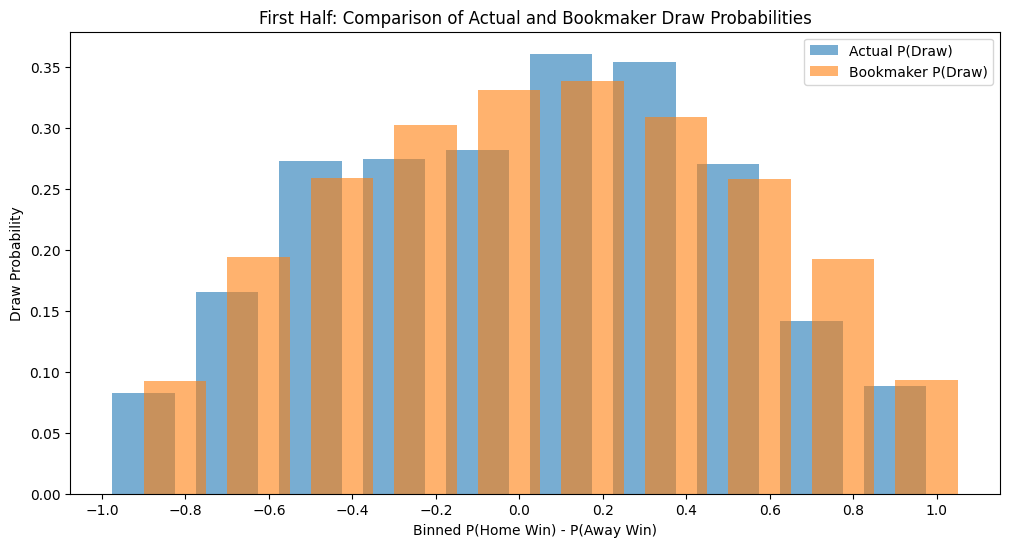

bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.272727
(-2.22e-16, 0.2]    0.360765
(0.2, 0.4]          0.353692
(0.4, 0.6]          0.270369
dtype: float64


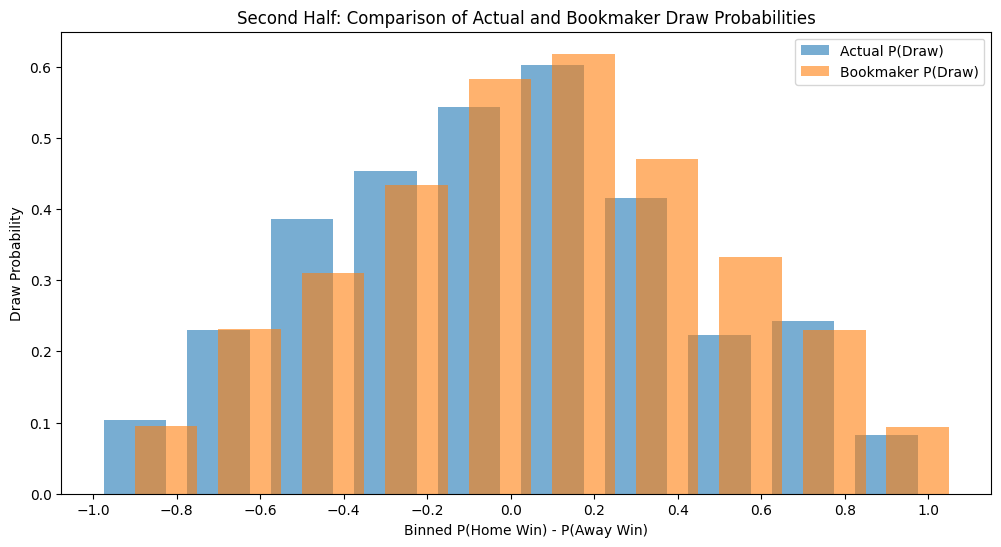

bins with advantage to bet on: P_diff_bin
(-1.0, -0.8]    0.103505
(-0.6, -0.4]    0.386364
(-0.4, -0.2]    0.453321
(0.6, 0.8]      0.243024
dtype: float64


In [158]:
# calculate and plot
# use norm=True for normalized bookmaker probabilities
bins(first_half_data_prob, "First Half:",norm=False)
bins(second_half_data_prob, "Second Half:",norm=False)

If the actual draw probability is larger than the one proposed by the bookmaker, it might be possible to win money in the long run. For the first half of a match, this is the case for these bins:\
(-0.6, -0.4]       \
(-2.22e-16, 0.2]   \
(0.2, 0.4]         \
(0.4, 0.6]         

for the second half it is these:\
(-1.0, -0.8]    \
(-0.6, -0.4]    \
(-0.4, -0.2]    \
(0.6, 0.8]      

For the first half, the bins with a slight advantage for the home team, but with high probabilities for a draw, are possbily the most advantageous. For the second half it is those where the away team has a higher win probability. The biggest differnce falls in the (-.6, -0.4) bin, where the actual draw probability is almost 0.4, while the bookies onlyy account for a draw probability of around 0.3.

# Task 2

Matches that can creae noise in the outcome will be removed in this task. These matches are those with late goals after the 90th minute leading to a change in the outcome of the match as well as early red cards in the first 15 minutes of the game.\
A yellowred card in the early stages of the game has the same influence as a red card, but I could not get the code to run reliably and my laptop broke down in the final stages of this homework, making it impossible to fix the issue afterwards. 

In [159]:
# Define conditions for matches to remove
goals_after_90_condition = second_half_data[
    (second_half_data['minute'] > 45) & 
    ((second_half_data['Score Change - home'].diff() != 0) | (second_half_data['Score Change - away'].diff() != 0))
]

early_red_condition=first_half_data[
        (first_half_data['minute'] <= 15 ) & 
             ((first_half_data['Redcards - home'].diff() != 0 ) | (first_half_data['Redcards - away'].diff() != 0))   
]

#early_yellowred_condition=first_half_data[
#        (first_half_data['minute'] <= 15 ) & 
#             ((first_half_data['Yellowred Cards - home'].diff() != 0 ) | (first_half_data['Yellowred Cards - away'].diff() != 0))   
#]

# Count removed matches
ids_late_goal = pd.DataFrame(goals_after_90_condition['fixture_id'].unique())
ids_early_red = pd.DataFrame(early_red_condition['fixture_id'].unique())
ids_early_yellowred = pd.DataFrame(early_yellowred_condition['fixture_id'].unique())

matches_to_remove = pd.concat([ids_late_goal, ids_early_red]).drop_duplicates().reset_index(drop=True)
matches_to_remove_np = np.array(matches_to_remove)


# Remove these matches from both halves
first_half_removed = first_half_data[~first_half_data['fixture_id'].isin(matches_to_remove_np.tolist())]
second_half_removed = second_half_data[~second_half_data['fixture_id'].isin(matches_to_remove_np.tolist())]

print(f'There were {len(ids_late_goal)} matches with a goal after the 90th minute and {len(ids_early_red)} matches where a player was sent off in the first 15 minutes with a red card.')
print(f'{len(matches_to_remove)} matches were removed in total.')


There were 60 matches with a goal after the 90th minute and 92 matches where a player was sent off in the first 15 minutes with a red card.
140 matches were removed in total.


In [160]:
#Calculating Probabilities for data after removing noise creating data
first_half_removed_P = calc_prob(first_half_removed)
second_half_removed_P = calc_prob(second_half_removed)

first_half_removed_P_norm = calc_prob_norm(first_half_removed)
second_half_removed_P_norm = calc_prob_norm(second_half_removed)

first_half_removed_prob = pd.concat([first_half_removed, first_half_removed_P, first_half_removed_P_norm], axis=1)
second_half_removed_prob = pd.concat([second_half_removed, second_half_removed_P, second_half_removed_P_norm], axis=1)

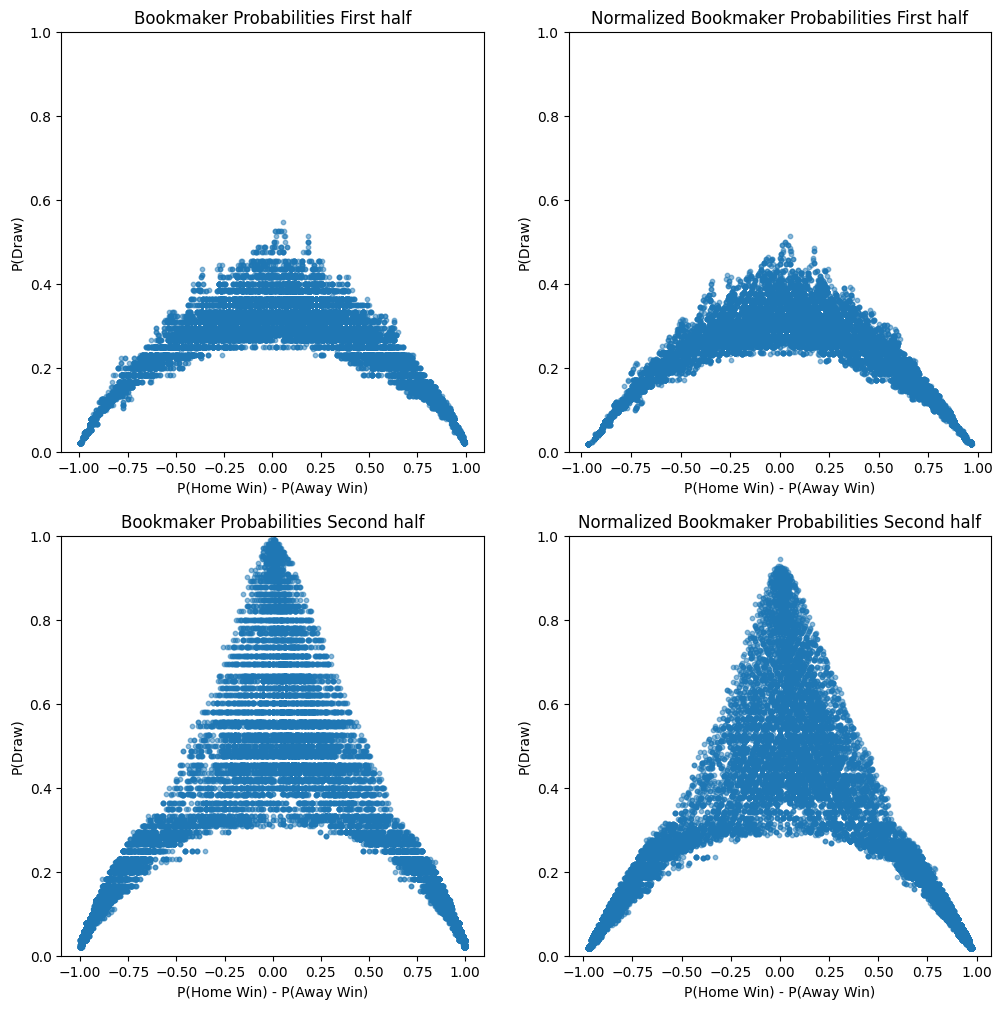

In [161]:
fig, _ = plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)
scatter(first_half_removed_prob, 'First half')
plt.subplot(2, 2, 2)
scatter_norm(first_half_removed_prob, 'First half')

plt.subplot(2, 2, 3)
scatter(second_half_removed_prob, 'Second half')
plt.subplot(2, 2, 4)
scatter_norm(second_half_removed_prob, 'Second half')
plt.show()

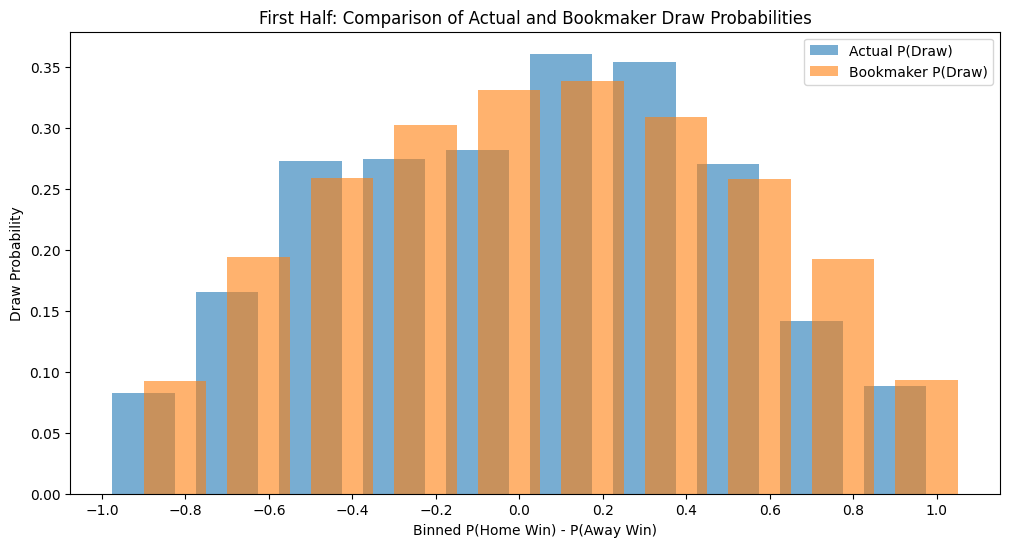

bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.272727
(-2.22e-16, 0.2]    0.360765
(0.2, 0.4]          0.353692
(0.4, 0.6]          0.270369
dtype: float64


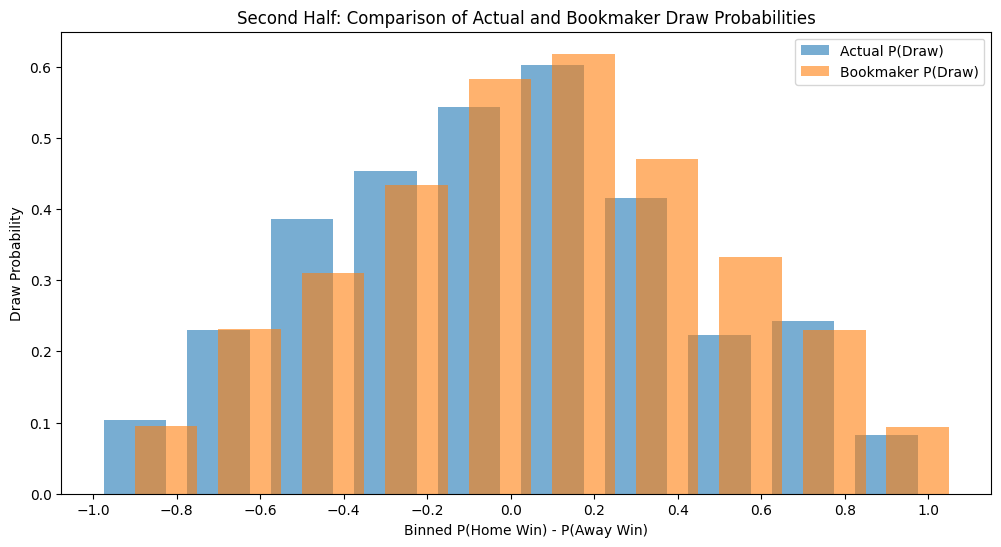

bins with advantage to bet on: P_diff_bin
(-1.0, -0.8]    0.103505
(-0.6, -0.4]    0.386364
(-0.4, -0.2]    0.453321
(0.6, 0.8]      0.243024
dtype: float64


In [162]:
# calculate and plot
# use norm=True for normalized bookmaker probabilities
bins(first_half_removed_prob, "First Half:",norm=False)
bins(second_half_removed_prob, "Second Half:",norm=False)

The results are the exact same as in Task 1, because the matches that should have been removed, were not removed. Once again a problem not fixable anymore with a broken laptop.
Rducing the noise by removing the mentioned matches should in theory make the bookmakers predictions be closer to the actual probabilities. This would in turn reduce the possibility of exploiting weaknesses in the bookmakers predictions in the long-term.

# Task 3

In [163]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [164]:
filtered_only_prob = calc_prob(filtered_data)
filtered_only_prob_norma = calc_prob_norm(filtered_data)

filtered_data_prob = pd.concat([filtered_data, filtered_only_prob, filtered_only_prob_norma], axis=1)

In [165]:
# Use LabelEncoder for result and halftime
label_encoder = LabelEncoder()
filtered_data_prob['result_enc'] = label_encoder.fit_transform(filtered_data_prob['result'])
filtered_data_prob['halftime_enc'] = label_encoder.fit_transform(filtered_data_prob['halftime'])

In [166]:
# Calculate additional features
filtered_data_prob['P_diff'] = filtered_data_prob['P_home'] - filtered_data_prob['P_away']
filtered_data_prob['minute_left'] = 90 - filtered_data_prob['minute']

# Define target variable
y = filtered_data_prob['result_enc']

# Extract numerical columns only
numerical_data = filtered_data_prob.select_dtypes(include=['number'])

# Drop unnecessary columns
X = numerical_data.drop(columns=['result_enc'])

# Fit the decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
tree_model.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=0)

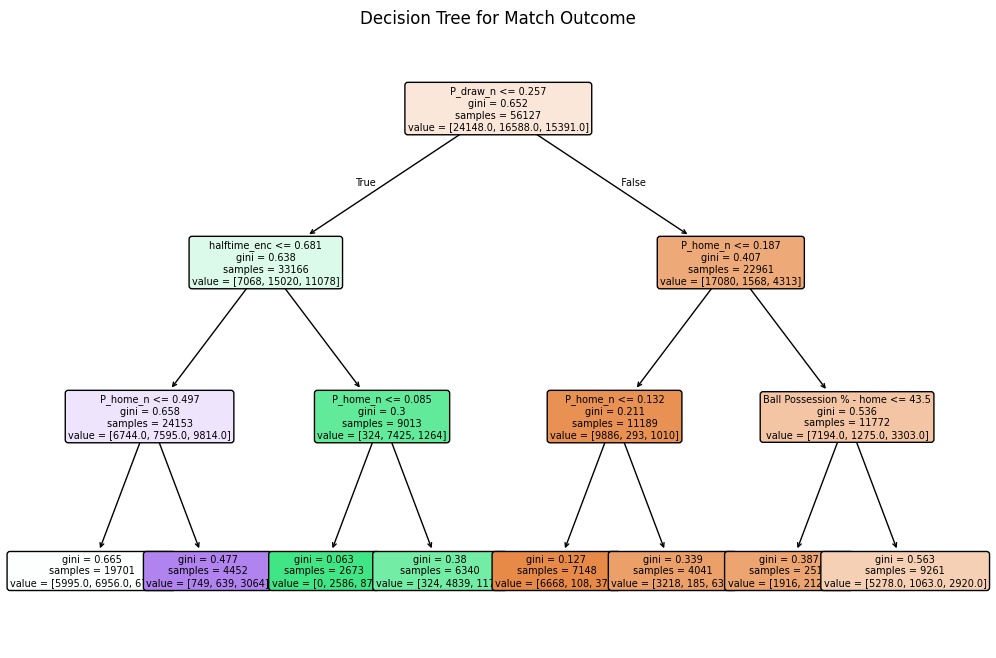

In [167]:
# Visualize decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=data_without_datetime.columns, filled=True, rounded=True, fontsize=7)
plt.title("Decision Tree for Match Outcome")
plt.show()

The first split is based on the normalized probability of a draw. The value being pretty low at 0.257 leads to a split of closer games without a sure outcome on the right (False) and less close games on the left (True). After that, the data is split regarding the home and away win probabilities. The third and final split uses the same feature of normalized away win probability for three of the four nodes, the last one being ball possession of the home team.\
P_away_n appears the most out of all features, indicating its importance and ability to differentiate results. It seems to be even more capable at differentiating than the other probabilities, even though the differences between those cannot be big.\
**Inefficiencies in the Market:** The predicted probabilites can be found in the value list in each leaf node with the market implied probabilities being P_home, P_away and P_draw. For a normalized away win probabilty lower than 0.085 for example, the tree predicts no wins by the home team. For high P_away_n, the tree sometimes predicts very low probabilities for an away win (see away win > 0.497 on the left side). But these predicted probabilities have to be taken with a grain of salt, because even though deviations between implied and predicted probabilities can imply market inefficencies, this decision tree model is extremely simplified and cannot be relied upon until further training and refinement.
